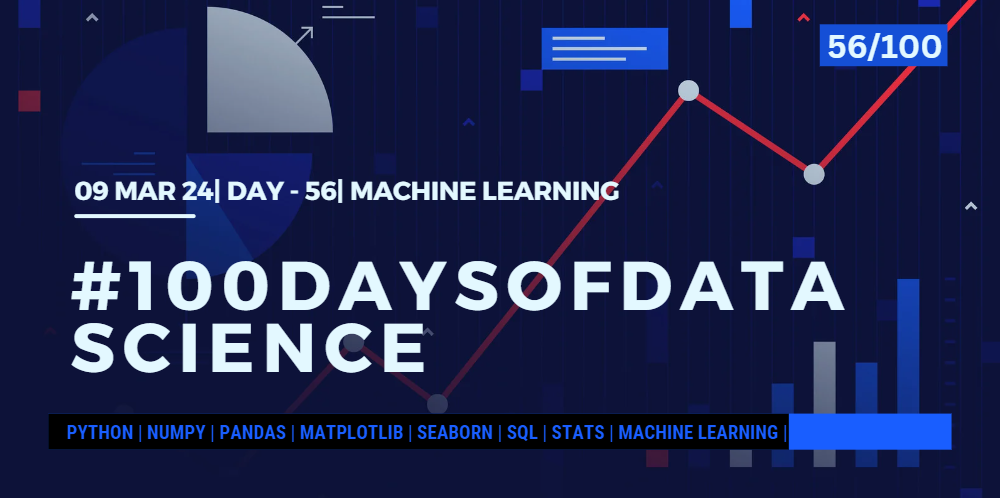

# <center>Support Vector Machine(SVM)<center><hr style="border:4.5px solid #108999"></hr>
    
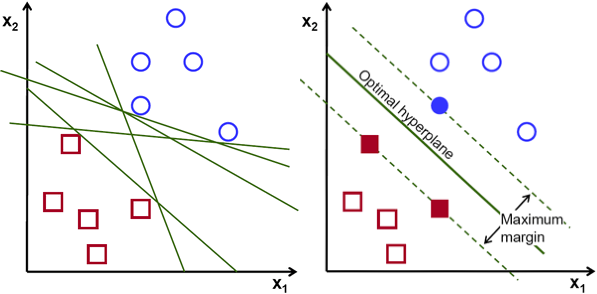
    
* A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonliner classification, regression, and even outlier detection.
* Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. 
* Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.
* The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
* To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

* <b>Hyperplanes and Support Vectors</b>

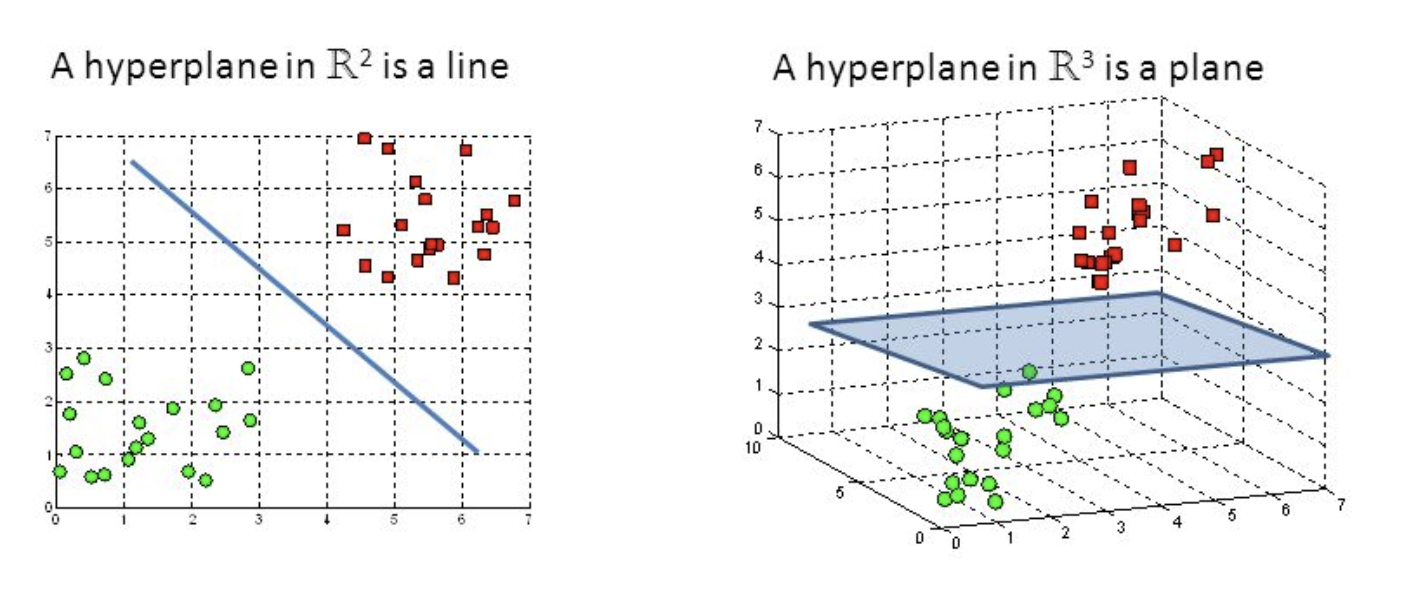

* Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. 
* Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.
* Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. 
* Using these support vectors, we maximize the margin of the classifier.
* Deleting the support vectors will change the position of the hyperplane. 
* These are the points that help us build our SVM.


* <b>SVM: Strengths and Applications:</b>
    - <b>High-Dimensional Data Hero: </b> SVM performs well even with high-dimensional data, making it suitable for complex datasets with many features.
    - <b>Clear Margin Champion:</b> SVM excels at classification tasks where there's a clear separation between classes. It identifies the optimal decision boundary that maximizes the margin between classes.
    - <b>Kernel Powerhouse:</b> SVMs can handle non-linear data by leveraging kernel functions. These functions essentially map the data into a higher-dimensional space where a linear separation becomes possible.

* <b>Considerations for SVM:</b>
    - <b>Finding the Sweet Spot:</b> Choosing the right kernel function can be crucial for optimal SVM performance. It can significantly impact the model's ability to separate the data effectively.
    - <b>Interpretability Challenges:</b> While the core concept is understandable, interpreting the inner workings of complex SVM models with specific kernels can be challenging.
    - <b>Training Time Considerations:</b> Training SVMs can be computationally expensive, especially for large datasets.

In [1]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Import the Dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [3]:
df.shape ### Checking Shape

(569, 31)

In [4]:
df.describe() ### Get information of the Dataset

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [5]:
df.columns ### Checking Columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [6]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.isnull().sum() ### Checking Null Values in the Data

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
print(cancer.target_names)

['malignant' 'benign']


In [9]:
df1 = pd.DataFrame.copy(df)
df1.shape

(569, 31)

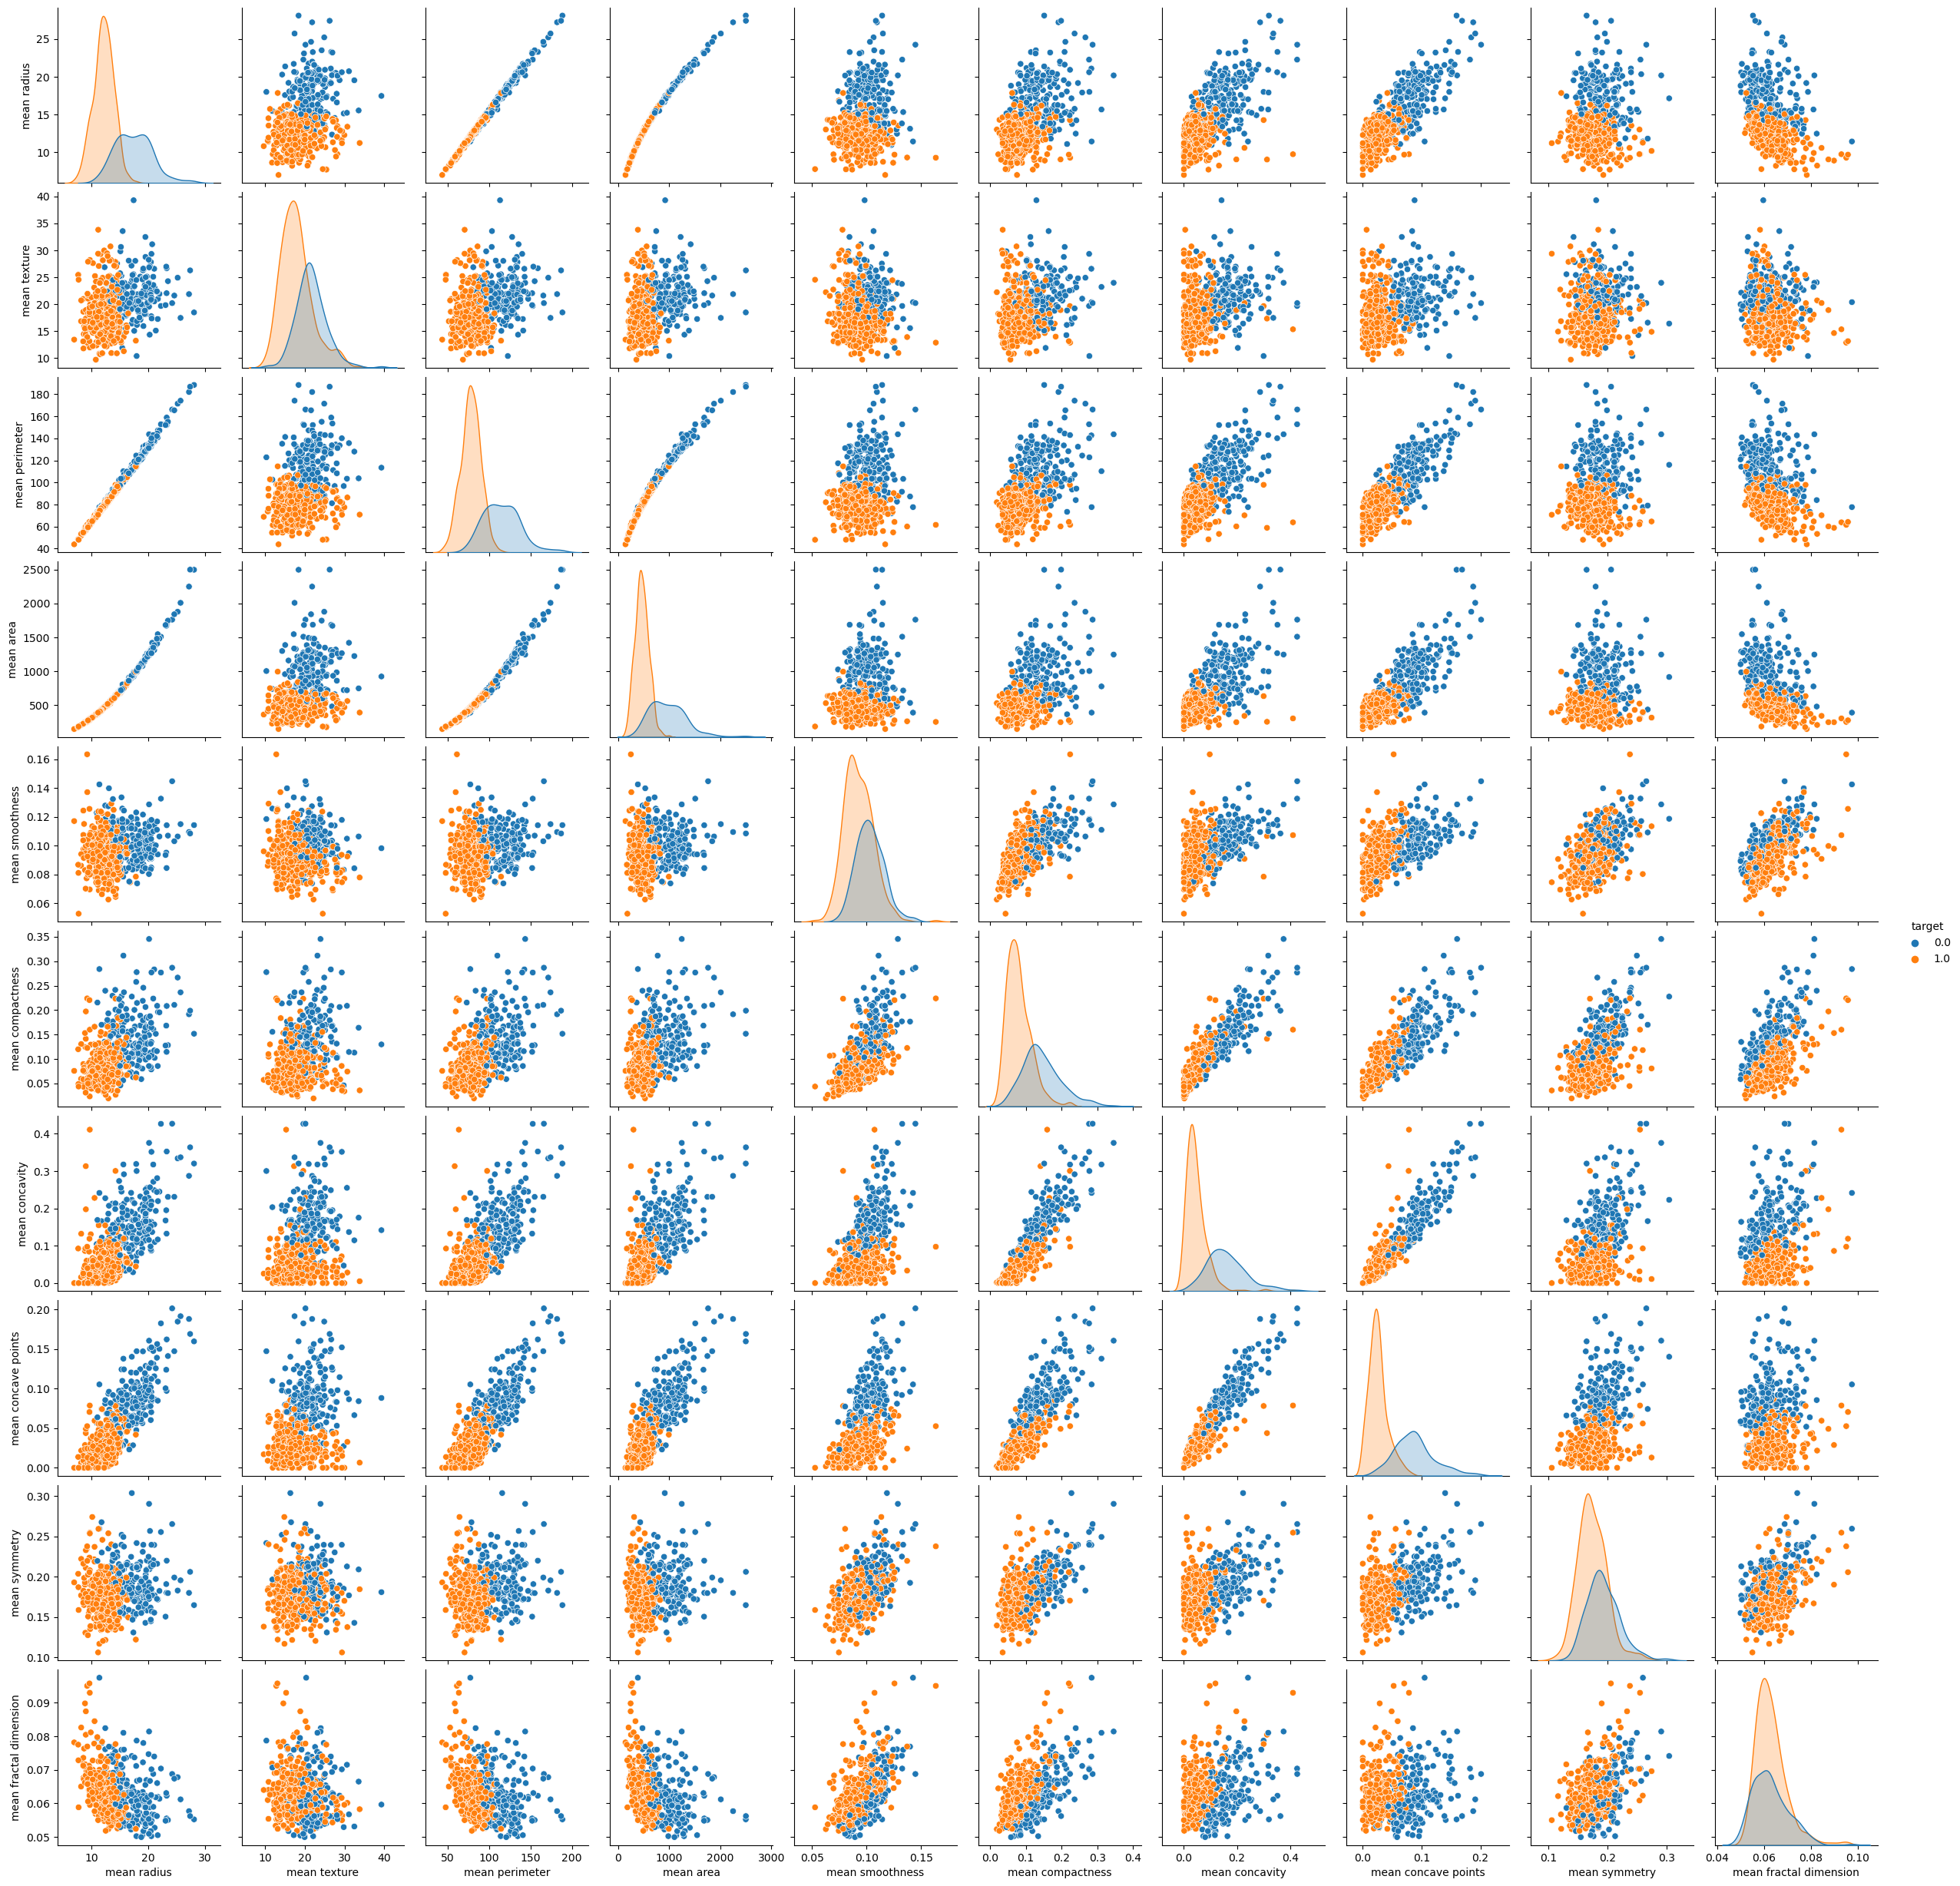

In [10]:
### Visualizing columns
sns.pairplot(df1, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension'])

<Axes: xlabel='target', ylabel='count'>

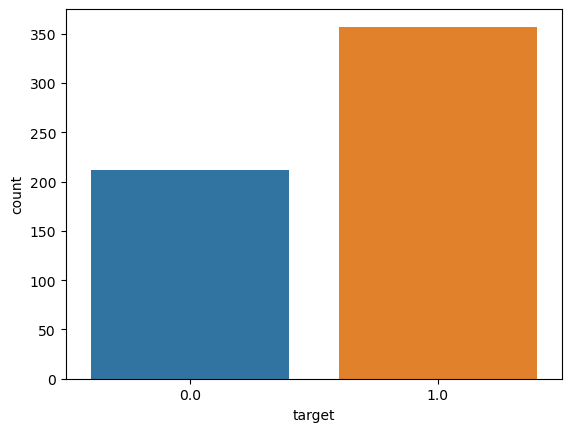

In [11]:
### Checking count
sns.countplot(x = df1['target'], label = "Count")

<Axes: xlabel='mean area', ylabel='mean smoothness'>

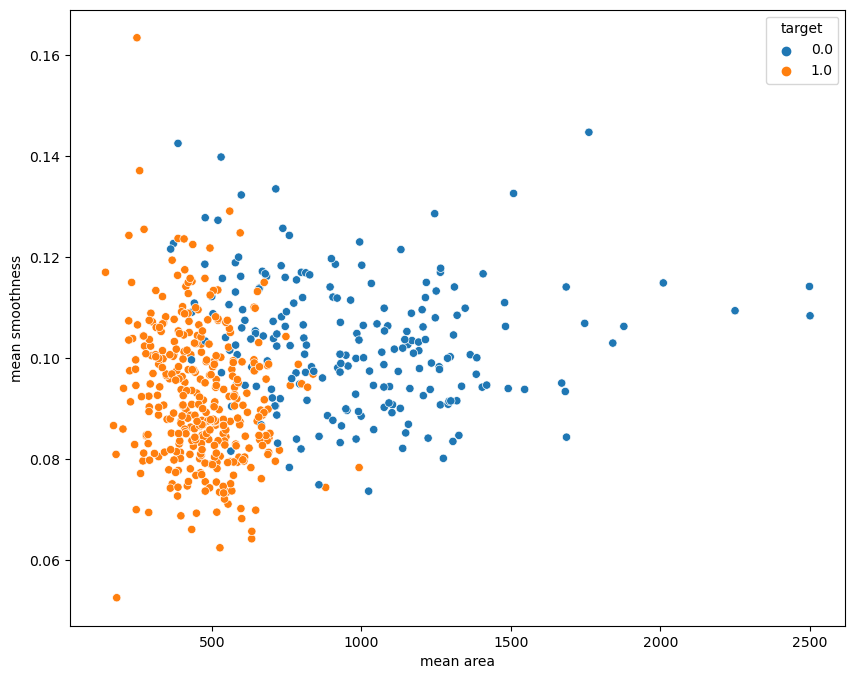

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df1)

<Axes: >

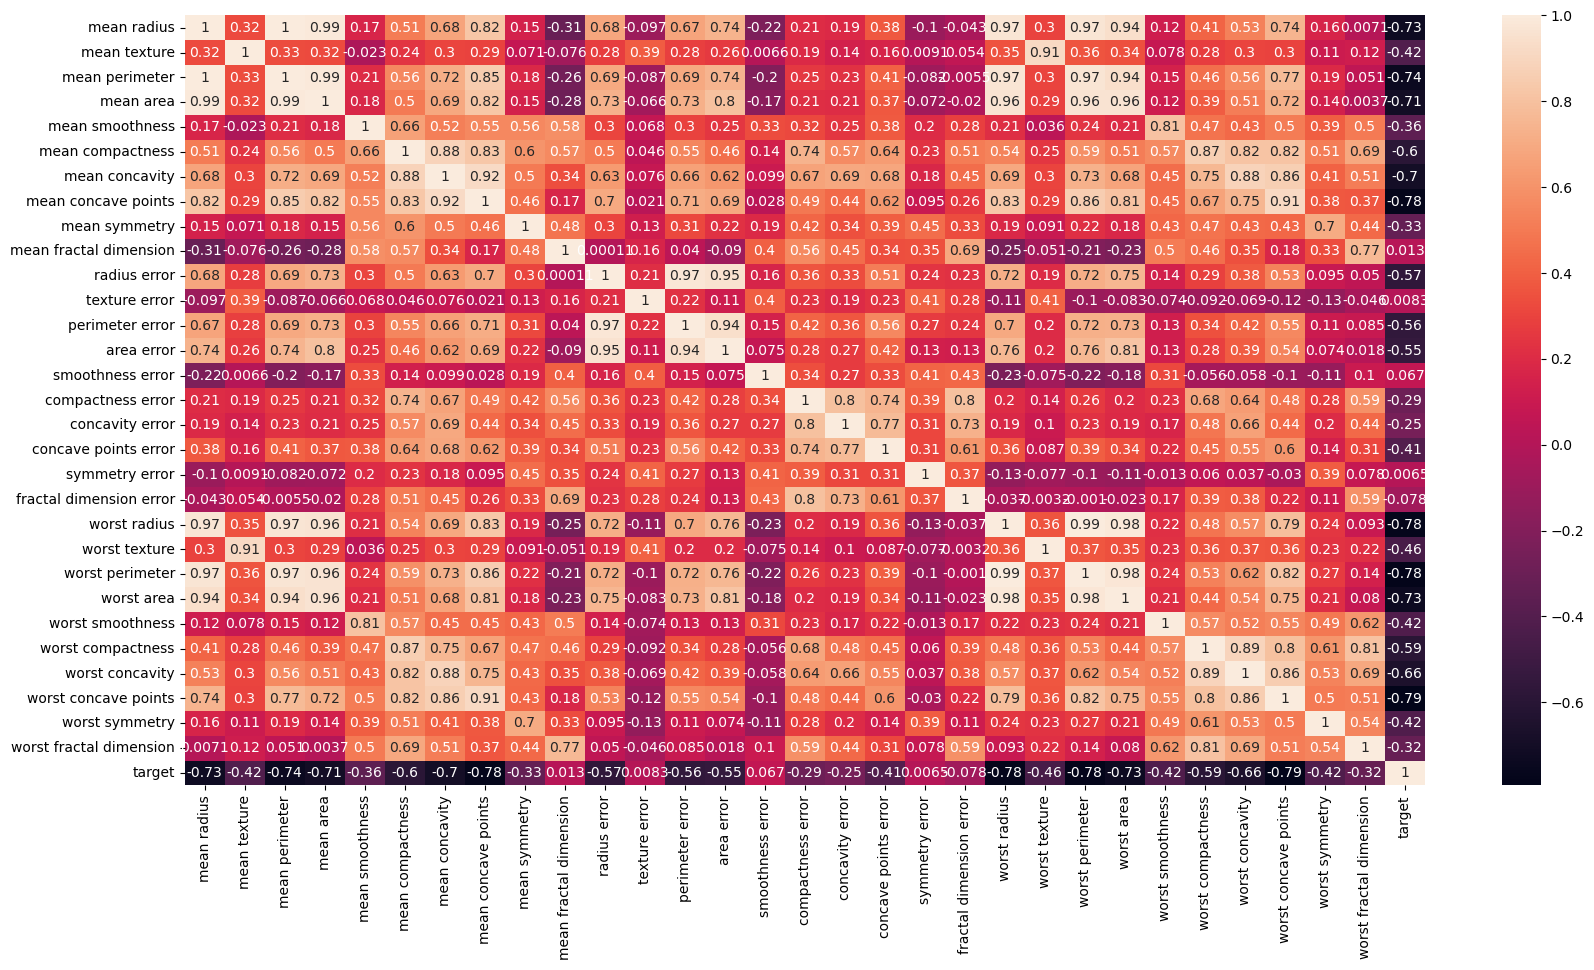

In [13]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,10)) 
sns.heatmap(df1.corr(), annot=True) 

In [14]:
### Finding numerical variables
colname_num = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(colname_num)))
print('The numerical variables are :', colname_num)

There are 31 numerical variables

The numerical variables are : ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']


In [15]:
df2 = df1.copy()
df2.shape

(569, 31)

In [16]:
df2.head(15)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.99         10.38          122.80     1001.0          0.11840   
1         20.57         17.77          132.90     1326.0          0.08474   
2         19.69         21.25          130.00     1203.0          0.10960   
3         11.42         20.38           77.58      386.1          0.14250   
4         20.29         14.34          135.10     1297.0          0.10030   
5         12.45         15.70           82.57      477.1          0.12780   
6         18.25         19.98          119.60     1040.0          0.09463   
7         13.71         20.83           90.20      577.9          0.11890   
8         13.00         21.82           87.50      519.8          0.12730   
9         12.46         24.04           83.97      475.9          0.11860   
10        16.02         23.24          102.70      797.8          0.08206   
11        15.78         17.89          103.60      781.0          0.09710   
12        19.17         24.80          132.40     1123.0          0.09740   
13        15.85         23.95          103.70      782.7          0.08401   
14        13.73         22.61           93.60      578.3          0.11310   

    mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.27760         0.30010              0.14710         0.2419   
1            0.07864         0.08690              0.07017         0.1812   
2            0.15990         0.19740              0.12790         0.2069   
3            0.28390         0.24140              0.10520         0.2597   
4            0.13280         0.19800              0.10430         0.1809   
5            0.17000         0.15780              0.08089         0.2087   
6            0.10900         0.11270              0.07400         0.1794   
7            0.16450         0.09366              0.05985         0.2196   
8            0.19320         0.18590              0.09353         0.2350   
9            0.23960         0.22730              0.08543         0.2030   
10           0.06669         0.03299              0.03323         0.1528   
11           0.12920         0.09954              0.06606         0.1842   
12           0.24580         0.20650              0.11180         0.2397   
13           0.10020         0.09938              0.05364         0.1847   
14           0.22930         0.21280              0.08025         0.2069   

    mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                  0.07871  ...          17.33           184.60      2019.0   
1                  0.05667  ...          23.41           158.80      1956.0   
2                  0.05999  ...          25.53           152.50      1709.0   
3                  0.09744  ...          26.50            98.87       567.7   
4                  0.05883  ...          16.67           152.20      1575.0   
5                  0.07613  ...          23.75           103.40       741.6   
6                  0.05742  ...          27.66           153.20      1606.0   
7                  0.07451  ...          28.14           110.60       897.0   
8                  0.07389  ...          30.73           106.20       739.3   
9                  0.08243  ...          40.68            97.65       711.4   
10                 0.05697  ...          33.88           123.80      1150.0   
11                 0.06082  ...          27.28           136.50      1299.0   
12                 0.07800  ...          29.94           151.70      1332.0   
13                 0.05338  ...          27.66           112.00       876.5   
14                 0.07682  ...          32.01           108.80       697.7   

    worst smoothness  worst compactness  worst concavity  \
0             0.1622             0.6656           0.7119   
1             0.1238             0.1866           0.2416   
2             0.1444             0.4245           0.4504   
3             0.2098             0.8663          

In [17]:
for col in df2.columns:
    print(f"{col} has {df2[col].nunique()} categories\n")

mean radius has 456 categories

mean texture has 479 categories

mean perimeter has 522 categories

mean area has 539 categories

mean smoothness has 474 categories

mean compactness has 537 categories

mean concavity has 537 categories

mean concave points has 542 categories

mean symmetry has 432 categories

mean fractal dimension has 499 categories

radius error has 540 categories

texture error has 519 categories

perimeter error has 533 categories

area error has 528 categories

smoothness error has 547 categories

compactness error has 541 categories

concavity error has 533 categories

concave points error has 507 categories

symmetry error has 498 categories

fractal dimension error has 545 categories

worst radius has 457 categories

worst texture has 511 categories

worst perimeter has 514 categories

worst area has 544 categories

worst smoothness has 411 categories

worst compactness has 529 categories

worst concavity has 539 categories

worst concave points has 492 catego

In [18]:
df3 = df2.copy()
df3.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [19]:
### Spliting Data into X and y
X = df3.values[:,:-1]
y = df3.values[:,-1]
print('X:',X.shape)
print('*' * 13)
print('y:',y.shape)

X: (569, 30)
*************
y: (569,)


In [20]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
MinMax = MinMaxScaler()
MinMax.fit(X)
X = MinMax.transform(X)
#x = scaler.fit_transform(x)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [21]:
y = y.astype(int) ### convert y in to integer always perform this operation

In [22]:
### Spliting into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (455, 30)
X_test:  (114, 30)
y_train:  (455,)
y_test:  (114,)


### Linear Kernel SVM

The simplest and fastest option. It assumes the data is already linearly separable in the original feature space. This makes it efficient for datasets where a clear linear boundary already exists.

In [23]:
#importing model
from sklearn.svm import LinearSVC
#create a model object
linear_svc = LinearSVC(loss='hinge', dual=True)
#train the model object
linear_svc.fit(X_train,y_train)
#predict score using the model
y_pred = linear_svc.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [24]:
# Checking confusion matrix for the model
cfm = confusion_matrix(y_test,y_pred)
dff = pd.DataFrame(cfm)
dff.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

In [25]:
# Checking classification report score for the model
cr = classification_report(y_test,y_pred)
print("Classification report: ")
print(cr)

# Checking accuracy score for the model
acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy of the model:  0.9736842105263158


### Polynomial Kernel SVM

This kernel applies a polynomial transformation to the data, essentially creating new features based on combinations of the existing ones. This can be particularly useful for capturing non-linear relationships between features in the data. However, choosing the right polynomial degree is crucial to avoid overfitting.

In [26]:
#importing model
from sklearn.svm import SVC
#create a model object
svc = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
#train the model object
svc.fit(X_train,y_train)
#predict score using the model
y_pred = svc.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [27]:
# Checking confusion matrix for the model
cfm = confusion_matrix(y_test,y_pred)
dff = pd.DataFrame(cfm)
dff.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

In [28]:
# Checking classification report score for the model
cr = classification_report(y_test,y_pred)
print("Classification report: ")
print(cr)

# Checking accuracy score for the model
acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy of the model:  0.9824561403508771


### Radial Basis Function (RBF) Kernel SVM
Often referred to as the "Swiss Army Knife" of kernels due to its versatility. The RBF kernel transforms data points based on their distance from a specific point in the higher-dimensional space. This allows it to effectively handle complex non-linear relationships and works well for a wide range of datasets. However, it can be computationally more expensive compared to the linear kernel.

In [29]:
#importing model
from sklearn.svm import SVC
#create a model object
radial_svc = SVC(kernel='rbf', gamma=0.5, C=0.1)
#train the model object
radial_svc.fit(X_train,y_train)
#predict score using the model
y_pred = radial_svc.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [30]:
# Checking confusion matrix for the model
cfm = confusion_matrix(y_test,y_pred)
dff = pd.DataFrame(cfm)
dff.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

In [31]:
# Checking classification report score for the model
cr = classification_report(y_test,y_pred)
print("Classification report: ")
print(cr)

# Checking accuracy score for the model
acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy of the model:  0.956140350877193


##### <center> Made with ❤️ by Zahid Salim Shaikh</center>